# Part 1. Comparing across continents

In this section, we aim to visually display the daily total confirmed cases of COVID-19 from the beginning of the outbreak around 12/31/19 to 04/29/20 in each six continents. Then, we analyzed the data using summmary functions by computing the mean, standard deviation, and rate of increase in each continent. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
covid_continents = pd.read_csv("covid_continents.csv")
covid_continents.head()

,Unnamed: 0,Entity,Code,Date,Total_confirmed_cases
0,545,Asia,NaN,31-Dec-19,27
1,546,Asia,NaN,1-Jan-20,27
2,547,Asia,NaN,2-Jan-20,27
3,548,Asia,NaN,3-Jan-20,44
4,549,Asia,NaN,4-Jan-20,44


In [3]:
# Select wanted columns only
covid_continents = covid_continents[['Entity', 'Date', 'Total_confirmed_cases']]

# Rename the column "Entity" to "Continent"
covid_continents = covid_continents.rename(columns = {'Entity': 'Continent'})

# Set the column "Continent" as the index
covid_continents.set_index('Continent', inplace=True, drop=True)

# Compute the log of total confirmed cases and add the log column to df
covid_continents["Log_total_confirmed_cases"] = np.log(covid_continents.Total_confirmed_cases)

# Convert date to number of days after 12/31/19 and add that column to df
# Acknowledge Prof.Mimno's code
covid_continents["Date"] = pd.to_datetime(covid_continents["Date"])
start_date = pd.Timestamp("2019-12-31")
covid_continents["Daysafter"] = (covid_continents["Date"] - start_date).dt.days

covid_continents.head()

,Date,Total_confirmed_cases,Log_total_confirmed_cases,Daysafter
Continent,,,,
Asia,2019-12-31,27,3.295837,0
Asia,2020-01-01,27,3.295837,1
Asia,2020-01-02,27,3.295837,2
Asia,2020-01-03,44,3.784190,3
Asia,2020-01-04,44,3.784190,4


## Total confirmed cases in 6 continents

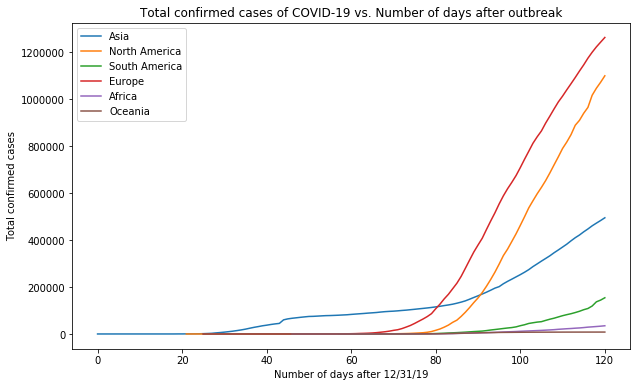

In [4]:
plt.figure(figsize=(10,6))

plt.plot(covid_continents.loc["Asia"].Daysafter, covid_continents.loc["Asia"].Total_confirmed_cases, label="Asia")
plt.plot(covid_continents.loc["North America"].Daysafter, covid_continents.loc["North America"].Total_confirmed_cases, label="North America")
plt.plot(covid_continents.loc["South America"].Daysafter, covid_continents.loc["South America"].Total_confirmed_cases, label="South America")
plt.plot(covid_continents.loc["Europe"].Daysafter, covid_continents.loc["Europe"].Total_confirmed_cases, label="Europe")
plt.plot(covid_continents.loc["Africa"].Daysafter, covid_continents.loc["Africa"].Total_confirmed_cases, label="Africa")
plt.plot(covid_continents.loc["Oceania"].Daysafter, covid_continents.loc["Oceania"].Total_confirmed_cases, label="Oceania")

plt.legend(loc="upper left")
plt.title("Total confirmed cases of COVID-19 vs. Number of days after outbreak")
plt.xlabel("Number of days after 12/31/19")
plt.ylabel("Total confirmed cases")
plt.show()

## Log of total confirmed cases in 6 continents - comparing the rate of increase

Computing log transforms an exponential growth to a linear growth

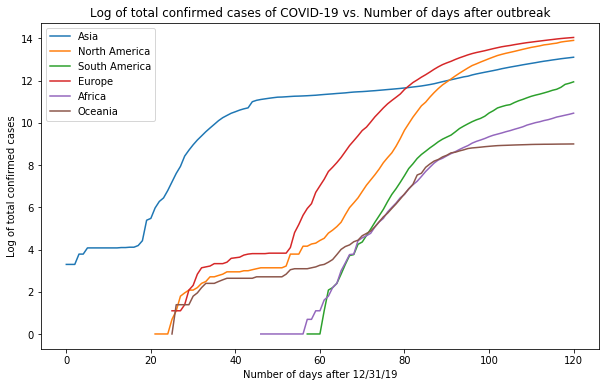

In [5]:
plt.figure(figsize=(10,6))

plt.plot(covid_continents.loc["Asia"].Daysafter, covid_continents.loc["Asia"].Log_total_confirmed_cases, label="Asia")
plt.plot(covid_continents.loc["North America"].Daysafter, covid_continents.loc["North America"].Log_total_confirmed_cases, label="North America")
plt.plot(covid_continents.loc["South America"].Daysafter, covid_continents.loc["South America"].Log_total_confirmed_cases, label="South America")
plt.plot(covid_continents.loc["Europe"].Daysafter, covid_continents.loc["Europe"].Log_total_confirmed_cases, label="Europe")
plt.plot(covid_continents.loc["Africa"].Daysafter, covid_continents.loc["Africa"].Log_total_confirmed_cases, label="Africa")
plt.plot(covid_continents.loc["Oceania"].Daysafter, covid_continents.loc["Oceania"].Log_total_confirmed_cases, label="Oceania")

plt.legend(loc="upper left")
plt.title("Log of total confirmed cases of COVID-19 vs. Number of days after outbreak")
plt.xlabel("Number of days after 12/31/19")
plt.ylabel("Log of total confirmed cases")
plt.show()

In [6]:
# Create a function that returns the number of initial cases and the growth rate up to a certain day

def summary(continent, day):
    print(continent)
    covid = covid_continents.loc[continent]
    
    # nested function that calculates the slope, coeficcient, and r^2 value
    # Acknowledge Prof.Mimno's code
    def lm(df, inputs, output):
        model = LinearRegression().fit(df[inputs], df[output])
        coef_strings = ["{:.2f}".format(coefficient) for coefficient in model.coef_]
        r2_score = model.score(df[inputs], df[output])
        print("coefficients: {} intercept: {:.2f};   r^2: {:.2f}"
              .format(", ".join(coef_strings), model.intercept_, r2_score))
        return model.intercept_, coef_strings[0]
       
    print("\nBefore Day {}".format(day))
    model_before = lm(covid[ covid["Daysafter"] < day], ["Daysafter"],"Log_total_confirmed_cases" )
    print("initial cases: {:.1f}, growth rate: {:.0f}%".format(np.exp(model_before[0]), 100 * (np.exp(float(model_before[1])) - 1)))
    
    print("\nAfter Day {}".format(day))
    model_after = lm(covid[ covid["Daysafter"] > day], ["Daysafter"],"Log_total_confirmed_cases" )
    print("initial cases: {:.1f}, growth rate: {:.0f}%".format(np.exp(model_after[0]), 100 * (np.exp(float(model_after[1])) - 1)))

## Using trial and error to find out the number of days each continent took to flatten out the curve

In [7]:
summary("Asia", 50)

Asia

Before Day 50
coefficients: 0.20 intercept: 2.35;   r^2: 0.95
initial cases: 10.5, growth rate: 22%

After Day 50
coefficients: 0.03 intercept: 9.47;   r^2: 0.96
initial cases: 12921.4, growth rate: 3%


In [8]:
summary("Africa", 95)

Africa

Before Day 95
coefficients: 0.22 intercept: -11.39;   r^2: 0.98
initial cases: 0.0, growth rate: 25%

After Day 95
coefficients: 0.06 intercept: 3.47;   r^2: 1.00
initial cases: 32.2, growth rate: 6%


In [9]:
summary("Europe", 93)

Europe

Before Day 93
coefficients: 0.19 intercept: -4.20;   r^2: 0.96
initial cases: 0.0, growth rate: 21%

After Day 93
coefficients: 0.03 intercept: 10.13;   r^2: 0.97
initial cases: 24990.1, growth rate: 3%


In [10]:
summary("North America", 108)

North America

Before Day 108
coefficients: 0.17 intercept: -4.11;   r^2: 0.96
initial cases: 0.0, growth rate: 19%

After Day 108
coefficients: 0.03 intercept: 9.81;   r^2: 1.00
initial cases: 18223.6, growth rate: 3%


In [11]:
summary("South America", 83)

South America

Before Day 83
coefficients: 0.34 intercept: -19.22;   r^2: 0.99
initial cases: 0.0, growth rate: 40%

After Day 83
coefficients: 0.09 intercept: 1.12;   r^2: 0.98
initial cases: 3.1, growth rate: 9%


In [12]:
summary("Oceania", 105)

Oceania

Before Day 105
coefficients: 0.11 intercept: -2.24;   r^2: 0.93
initial cases: 0.1, growth rate: 12%

After Day 105
coefficients: 0.00 intercept: 8.61;   r^2: 0.94
initial cases: 5469.6, growth rate: 0%


# Part 2. Comparing across countries

We found out that the three countinents with the highest total confirmed cases are Europe, North America, and Asia. Next, we want to analyze specific countries within each continent and determine what factors have the most influence on the spread of COVID-19. To do so, we will pick the top 10 countries with the highest total confirmed cases in each continent. Together, we will be comparing across 30 countries. 

In [13]:
countries_0429 = pd.read_csv("countries_0429.csv", keep_default_na=False)
countries_0429.drop(countries_0429.columns[0],axis=1,inplace=True)
countries_0429.head()


,Entity,Code,Date,Total_confirmed_cases,Continent
0,Afghanistan,AFG,29-Apr-20,1827,AS
1,Albania,ALB,29-Apr-20,750,EU
2,Algeria,DZA,29-Apr-20,3649,AF
3,Andorra,AND,29-Apr-20,748,EU
4,Angola,AGO,29-Apr-20,27,AF


In [14]:
# Select wanted columns only
countries_0429 = countries_0429[['Entity', 'Date', 'Continent','Total_confirmed_cases']]

countries_0429 = pd.DataFrame(data=countries_0429)

# Rename the column "Entity" to "Continent"
countries_0429 = countries_0429.rename(columns = {'Entity': 'Country Name'})


# Compute the log of total confirmed cases and add the log column to df
countries_0429["Log_total_confirmed_cases"] = np.log(countries_0429.Total_confirmed_cases)

countries_0429.head()

,Country Name,Date,Continent,Total_confirmed_cases,Log_total_confirmed_cases
0,Afghanistan,29-Apr-20,AS,1827,7.510431
1,Albania,29-Apr-20,EU,750,6.620073
2,Algeria,29-Apr-20,AF,3649,8.202208
3,Andorra,29-Apr-20,EU,748,6.617403
4,Angola,29-Apr-20,AF,27,3.295837


In [15]:
# Create three dataframes of all the countries in Europe, North America, and Asia
europe = pd.DataFrame()
north_america = pd.DataFrame()
asia = pd.DataFrame()

for i in range(len(countries_0429)):
    if countries_0429.iloc[i].Continent == 'EU':
        europe = europe.append(countries_0429.iloc[i])
    if countries_0429.iloc[i].Continent == 'NA':
        north_america = north_america.append(countries_0429.iloc[i])
    if countries_0429.iloc[i].Continent == 'AS':
        asia = asia.append(countries_0429.iloc[i])


In [16]:
# Compute the mean and standard deviation of the total confirmed cases in North America
print("Europe")
print("mean of total confirmed cases: {:.0f}".format(np.mean(europe.Total_confirmed_cases)))
print("standard deviation of total confirmed cases: {:.2f}".format(np.std(europe.Total_confirmed_cases)))

# Print the top 10 countries in North America with the highest total confirmed cases
eu_10=europe.nlargest(10, ['Total_confirmed_cases'])['Country Name'] #top 10 countries ranked by total confirmed cases  
europe.nlargest(10, ['Total_confirmed_cases'])


Europe
mean of total confirmed cases: 22323
standard deviation of total confirmed cases: 46101.39


,Continent,Country Name,Date,Log_total_confirmed_cases,Total_confirmed_cases
94,EU,Italy,29-Apr-20,12.213569,201505.0
190,EU,United Kingdom,29-Apr-20,11.990060,161145.0
71,EU,Germany,29-Apr-20,11.968076,157641.0
66,EU,France,29-Apr-20,11.750642,126835.0
153,EU,Russia,29-Apr-20,11.446337,93558.0
18,EU,Belgium,29-Apr-20,10.764984,47334.0
132,EU,Netherlands,29-Apr-20,10.556229,38416.0
177,EU,Switzerland,29-Apr-20,10.281273,29181.0
149,EU,Portugal,29-Apr-20,10.099137,24322.0
91,EU,Ireland,29-Apr-20,9.897319,19877.0


In [17]:
# Compute the mean and standard deviation of the total confirmed cases in North America
print("North America")
print("mean of total confirmed cases: {:.0f}".format(np.mean(north_america.Total_confirmed_cases)))
print("standard deviation of total confirmed cases: {:.2f}".format(np.std(north_america.Total_confirmed_cases)))

# Print the top 10 countries in North America with the highest total confirmed cases
na_10=north_america.nlargest(10, ['Total_confirmed_cases'])['Country Name']
north_america.nlargest(10, ['Total_confirmed_cases'])

North America
mean of total confirmed cases: 32306
standard deviation of total confirmed cases: 170871.99


,Continent,Country Name,Date,Log_total_confirmed_cases,Total_confirmed_cases
191,NA,United States,29-Apr-20,13.828015,1012583.0
34,NA,Canada,29-Apr-20,10.820078,50015.0
121,NA,Mexico,29-Apr-20,9.726273,16752.0
54,NA,Dominican Republic,29-Apr-20,8.766550,6416.0
143,NA,Panama,29-Apr-20,8.732305,6200.0
46,NA,Cuba,29-Apr-20,7.270313,1437.0
150,NA,Puerto Rico,29-Apr-20,7.244228,1400.0
84,NA,Honduras,29-Apr-20,6.603944,738.0
43,NA,Costa Rica,29-Apr-20,6.558198,705.0
78,NA,Guatemala,29-Apr-20,6.322565,557.0


In [18]:
# Compute the mean and standard deviation of the total confirmed cases in Asia
print("Asia")
print("mean of total confirmed cases: {:.0f}".format(np.mean(asia.Total_confirmed_cases)))
print("standard deviation of total confirmed cases: {:.2f}".format(np.std(asia.Total_confirmed_cases)))

# Print the top 10 countries in Asia with the highest total confirmed cases
asia_10=asia.nlargest(10, ['Total_confirmed_cases'])['Country Name']
asia.nlargest(10, ['Total_confirmed_cases'])

Asia
mean of total confirmed cases: 11005
standard deviation of total confirmed cases: 24155.86


,Continent,Country Name,Date,Log_total_confirmed_cases,Total_confirmed_cases
185,AS,Turkey,29-Apr-20,11.649665,114653.0
89,AS,Iran,29-Apr-20,11.435872,92584.0
40,AS,China,29-Apr-20,11.337858,83940.0
87,AS,India,29-Apr-20,10.352395,31332.0
160,AS,Saudi Arabia,29-Apr-20,9.907330,20077.0
93,AS,Israel,29-Apr-20,9.654321,15589.0
165,AS,Singapore,29-Apr-20,9.612533,14951.0
141,AS,Pakistan,29-Apr-20,9.608109,14885.0
96,AS,Japan,29-Apr-20,9.536185,13852.0
151,AS,Qatar,29-Apr-20,9.386057,11921.0


## Compile the total confirmed cases, mean, and standard deviation into a grouped bar chart

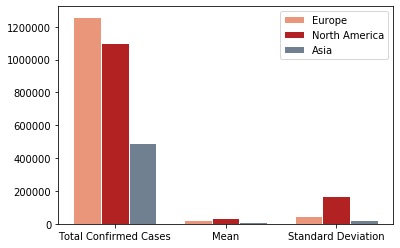

In [19]:
EU = [covid_continents.loc["Europe"].Total_confirmed_cases.max(), np.mean(europe.Total_confirmed_cases),
          np.std(europe.Total_confirmed_cases)]
NA = [covid_continents.loc["North America"].Total_confirmed_cases.max(), np.mean(north_america.Total_confirmed_cases), 
        np.std(north_america.Total_confirmed_cases)]
AS = [covid_continents.loc["Asia"].Total_confirmed_cases.max(), np.mean(asia.Total_confirmed_cases),
      np.std(asia.Total_confirmed_cases)]

barWidth = 0.25
r1 = np.arange(len(EU))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
plt.bar(r1, EU, color='darksalmon', width=barWidth, edgecolor='white', label='Europe')
plt.bar(r2, NA, color='firebrick', width=barWidth, edgecolor='white', label='North America')
plt.bar(r3, AS, color='slategrey', width=barWidth, edgecolor='white', label='Asia')
 
plt.xticks([r + barWidth for r in range(len(EU))], ['Total Confirmed Cases', 'Mean', 'Standard Deviation'])
plt.legend()
plt.show()


## Extract indicators for countries with top 10 confirmed number of cases in each of 3 continents

### Read all indicators

In [20]:
demo_eco = pd.read_csv('demographics_economics_indicators.csv')
medical = pd.read_csv('health_system_indicators.csv')
total_per_million = pd.read_csv('total_per_million_0429.csv',index_col=0)

### Merge all indicators from all the countries

In [21]:
df=pd.merge(demo_eco,medical, how='outer', on=['Country Name']) #merge all the indicatorss into one dataframe
df.drop(df.columns[0],axis=1,inplace=True) #drop the unnamed column
df.head() 


,Country Name,Under-5s_2015,5-14 years_2015,15-24 years_2015,25-64 years_2015,65+ years_2015,median age_2020,umemployment rate_2019,GDP_2018,Unnamed: 0_y,hospital_beds,Health expenditure per capita,Health expenditure out of pocket per capita,Physicians per 1000 people,handwashing facilities %,Total tests per thousand
0,Afghanistan,5239401.0,9784129.0,7062361.0,10809505.0,841098.0,18.600000,11.118,1955.006208,0.0,0.5,67.122650,75.482577,NaN,37.746032,NaN
1,Albania,171783.0,355206.0,475257.0,1554614.0,366492.0,38.000000,12.331,13364.155397,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,4663613.0,6760782.0,6614548.0,19492212.0,2340373.0,29.100000,11.704,15481.787620,7.0,1.9,258.494293,32.548839,NaN,83.740603,NaN
3,Angola,5158374.0,7957871.0,5329040.0,8771497.0,642523.0,16.799999,6.886,6452.355165,25.0,NaN,114.459641,34.121013,0.2149,26.664183,NaN
4,Argentina,3718139.0,7221374.0,6894781.0,20839515.0,4743956.0,31.900000,9.789,20610.568550,28.0,NaN,1324.603516,15.018527,3.9600,NaN,1.24


### Merge all 30 countries (10 from each selected continent) with their indicators accordingly

In [22]:
countries_20 = asia_10.append(eu_10)
countries_30 = np.sort(na_10.append(countries_20))      # Sorted version of the 30 chosen countries
countries_30 = pd.DataFrame({'Country Name':countries_30})

allc = pd.DataFrame()
countries_factors = pd.merge(df,countries_30, how='inner', on=['Country Name'])
countries_factors

,Country Name,Under-5s_2015,5-14 years_2015,15-24 years_2015,25-64 years_2015,65+ years_2015,median age_2020,umemployment rate_2019,GDP_2018,Unnamed: 0_y,hospital_beds,Health expenditure per capita,Health expenditure out of pocket per capita,Physicians per 1000 people,handwashing facilities %,Total tests per thousand
0,Belgium,644952.0,1274467.0,1325250.0,5995378.0,2047893.0,41.799999,5.589,51407.998337,34.0,NaN,4507.356445,17.638223,NaN,NaN,26.344
1,Canada,1943660.0,3800358.0,4610394.0,19790246.0,5805051.0,41.400002,5.564,48130.255973,49.0,NaN,4754.947754,14.219750,2.6102,NaN,20.095
2,China,85884695.0,161188094.0,182107622.0,832669638.0,135178504.0,38.700001,4.320,18236.612982,52.0,NaN,440.825623,36.050412,NaN,NaN,NaN
3,Costa Rica,350326.0,722240.0,809903.0,2497433.0,427950.0,33.599998,11.854,17671.095353,4.0,1.2,869.077759,21.255390,NaN,NaN,1.811
4,Dominican Republic,1062224.0,2091961.0,1917906.0,4755883.0,700420.0,27.600000,5.845,17748.185319,65.0,NaN,433.208588,44.738197,1.5600,55.181981,NaN
5,France,3873546.0,7899648.0,7513481.0,32963334.0,12207192.0,42.000000,8.427,45342.395736,73.0,NaN,4379.727051,9.384219,NaN,NaN,NaN
6,Germany,3517798.0,7201251.0,8673083.0,45060963.0,17254694.0,46.599998,3.043,53074.540118,62.0,NaN,5033.452148,12.672919,NaN,NaN,NaN
7,Guatemala,1994029.0,3894499.0,3465454.0,6165898.0,732549.0,22.900000,2.459,8462.374008,84.0,NaN,259.935028,54.134107,NaN,76.665504,NaN
8,Honduras,954683.0,2001592.0,1885210.0,3723771.0,395573.0,24.900000,5.386,5138.752457,86.0,NaN,195.935745,48.701677,0.3144,NaN,NaN
9,India,121415293.0,253729589.0,241513478.0,618614126.0,73781494.0,28.200001,5.355,7762.881770,89.0,NaN,69.293098,62.401503,0.7776,59.549688,0.559


### Find the relationship between confirmed cases and the different factors

In [29]:
countries_selected = countries_factors['Country Name']

#select the 30 counties from the total_per_million dataframe
total_per_million_selected = pd.DataFrame()
for x in countries_selected:
     total_per_million_selected = total_per_million_selected.append(total_per_million[total_per_million['Country Name']== x])

#merge all factors into one dataframe
countries_all_factors = pd.merge(countries_factors,total_per_million_selected, how='inner', on=['Country Name'])
#drop columns that have too many NaNs
countries_all_factors = countries_all_factors.drop(['hospital_beds','handwashing facilities %','Unnamed: 0_y'],axis=1)
#replace the missing data with the mean of that column
countries_all_factors.fillna(countries_all_factors.mean(), inplace=True)

countries_all_factors.head()

,Country Name,Under-5s_2015,5-14 years_2015,15-24 years_2015,25-64 years_2015,65+ years_2015,median age_2020,umemployment rate_2019,GDP_2018,Health expenditure per capita,Health expenditure out of pocket per capita,Physicians per 1000 people,Total tests per thousand,Total cases per million
0,Belgium,644952.0,1274467.0,1325250.0,5995378.0,2047893.0,41.799999,5.589,51407.998337,4507.356445,17.638223,2.604222,26.3440,4084.173
1,Canada,1943660.0,3800358.0,4610394.0,19790246.0,5805051.0,41.400002,5.564,48130.255973,4754.947754,14.219750,2.610200,20.0950,1325.176
2,China,85884695.0,161188094.0,182107622.0,832669638.0,135178504.0,38.700001,4.320,18236.612982,440.825623,36.050412,2.604222,15.9661,58.319
3,Costa Rica,350326.0,722240.0,809903.0,2497433.0,427950.0,33.599998,11.854,17671.095353,869.077759,21.255390,2.604222,1.8110,138.395
4,Dominican Republic,1062224.0,2091961.0,1917906.0,4755883.0,700420.0,27.600000,5.845,17748.185319,433.208588,44.738197,1.560000,15.9661,591.451


Under-5s_2015 : slope = -1.7968733919825305e-05 intercept = 1717.7058179157525


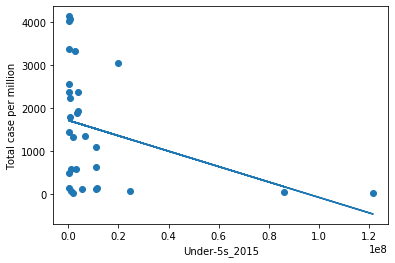

5-14 years_2015 : slope = -8.631649111607114e-06 intercept = 1707.884949734545


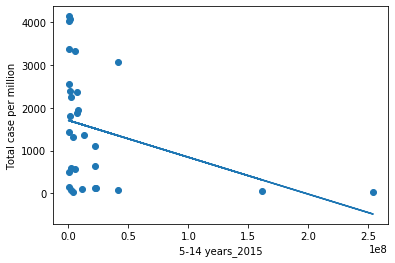

15-24 years_2015 : slope = -8.589525282683944e-06 intercept = 1710.0633780564262


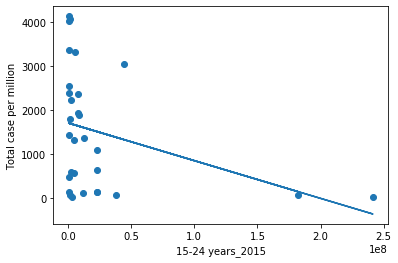

25-64 years_2015 : slope = -2.343988729278661e-06 intercept = 1698.1361171385558


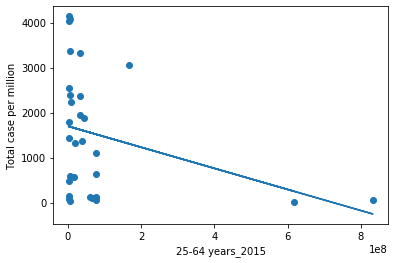

65+ years_2015 : slope = -1.2892668218821645e-05 intercept = 1700.7453326822997


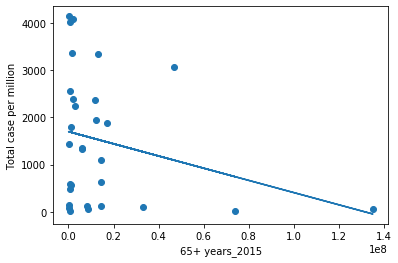

median age_2020 : slope = 93.18156386995388 intercept = -1877.3686396172184


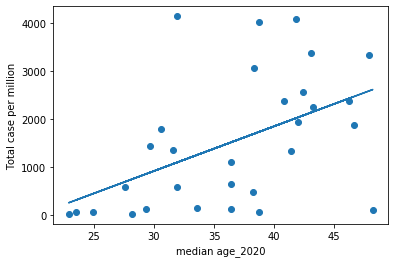

umemployment rate_2019 : slope = -60.01760371688192 intercept = 1835.996901838798


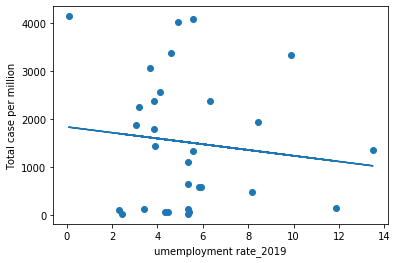

GDP_2018 : slope = 0.03736165933445307 intercept = -75.01045973192299


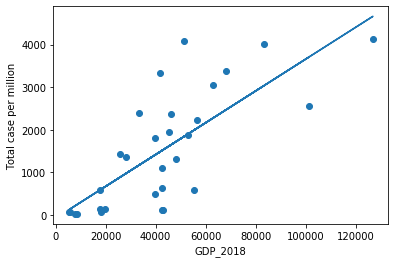

Health expenditure per capita : slope = 0.3233378021856188 intercept = 612.8691718905618


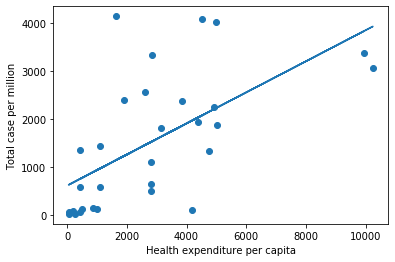

Health expenditure out of pocket per capita : slope = -46.637318549952894 intercept = 2737.2390795656906


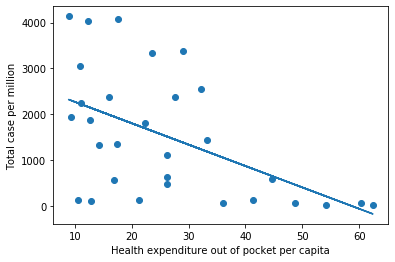

Physicians per 1000 people : slope = -69.90544908365456 intercept = 1697.8700906247439


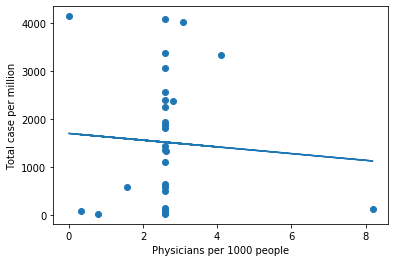

Total tests per thousand : slope = 73.11227994142725 intercept = 348.5027938938449


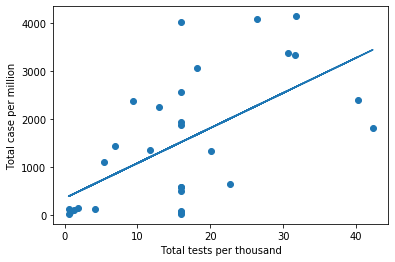

In [38]:
#draw scatter plot to show the relationship between total case per million and the different factors
for column in countries_all_factors.columns[1:13]:
    plt.scatter(countries_all_factors[column],countries_all_factors['Total cases per million'])
    #plot a linear regression line and find the slope for each graph
    model = LinearRegression().fit(countries_all_factors[[column]], countries_all_factors['Total cases per million'] )
    predictions = countries_all_factors[column] * model.coef_[0] + model.intercept_
    print(column,':','slope =',model.coef_[0],'intercept =',model.intercept_)
    plt.plot(countries_all_factors[column],predictions)
    plt.xlabel(column)
    plt.ylabel('Total case per million')
    plt.show()

under-5s : slope = -29711.966483960685 intercept = 3680.9902015251123


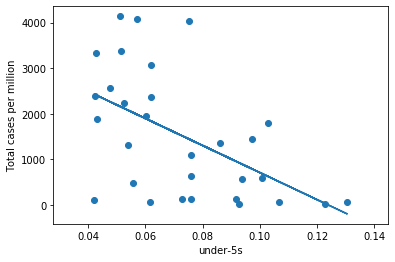

5-14 years : slope = -18696.136342692967 intercept = 4195.70379957506


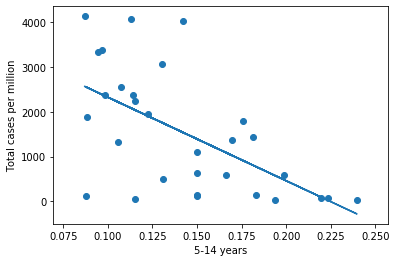

15-24 years : slope = -25905.666653213913 intercept = 5285.761821844793


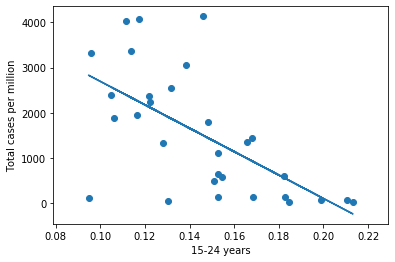

25-64 years : slope = 12276.579006476448 intercept = -4838.205023015918


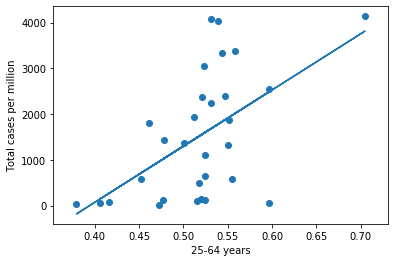

65+ years : slope = 8345.101184906529 intercept = 508.6468554675255


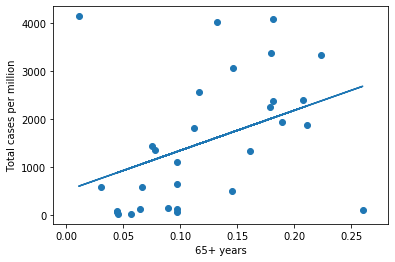

In [39]:
# Because there are outliers in the age-breakdown graphs, it is hard to see the correlation between x and y, so we standardized age breakdown for better comparison
countries_all_factors['Total population'] = countries_all_factors['Under-5s_2015']+countries_all_factors['5-14 years_2015']+countries_all_factors['15-24 years_2015']+countries_all_factors['25-64 years_2015']+countries_all_factors['65+ years_2015']
countries_all_factors.head()
under_5_pc = countries_all_factors['Under-5s_2015']/countries_all_factors['Total population']
_65_plus_pc = countries_all_factors['65+ years_2015']/countries_all_factors['Total population']
_5_14_pc = countries_all_factors['5-14 years_2015']/countries_all_factors['Total population']
_15_24_pc = countries_all_factors['15-24 years_2015']/countries_all_factors['Total population']
_25_64_pc = countries_all_factors['25-64 years_2015']/countries_all_factors['Total population']

#create a new dataframe that have all the age breakdown percentage
column_names=['under-5s','5-14 years','15-24 years','25-64 years','65+ years']
ages_pc = pd.DataFrame(columns=column_names)
ages_pc['under-5s'] = under_5_pc
ages_pc['5-14 years'] = _5_14_pc
ages_pc['15-24 years'] = _15_24_pc
ages_pc['25-64 years'] = _25_64_pc
ages_pc['65+ years'] = _65_plus_pc


#plot a linear regression line on a scatter plot, x=age breakdown percentage, y=total cases per million
for column in ages_pc:
    plt.scatter(ages_pc[column] , countries_all_factors['Total cases per million'])
    age_model = LinearRegression().fit(ages_pc[[column]], countries_all_factors['Total cases per million'] )
    predictions = ages_pc[column] * age_model.coef_[0] + age_model.intercept_
    print(column,':','slope =',age_model.coef_[0],'intercept =',age_model.intercept_)
    plt.plot(ages_pc[column],predictions)
    plt.xlabel(column)
    plt.ylabel('Total cases per million')
    plt.show()

In [57]:
#calculate the rank correlation between each factor and Total cases per million

#for age breakdown
for column in ages_pc:
    rank_corrcoef = np.corrcoef(ages_pc[column].rank() , countries_all_factors['Total cases per million'].rank())[0,1]
    print('rank correlation between', column, 'and total cases per million = % .3f' %rank_corrcoef)

#for others  
clean_df = countries_all_factors.copy()
clean_df = clean_df.drop(['Country Name','Under-5s_2015','65+ years_2015','5-14 years_2015','15-24 years_2015','25-64 years_2015','Total cases per million','Total population'],axis=1)
clean_df.head()

for column in clean_df:
    rank_correlation = np.corrcoef(clean_df[column].rank() , countries_all_factors['Total cases per million'].rank())[0,1]
    print('rank correlation between', column, 'and total cases per million = % .3f' %rank_correlation)

rank correlation between under-5s and total cases per million = -0.544
rank correlation between 5-14 years and total cases per million = -0.630
rank correlation between 15-24 years and total cases per million = -0.651
rank correlation between 25-64 years and total cases per million =  0.561
rank correlation between 65+ years and total cases per million =  0.497
rank correlation between median age_2020 and total cases per million =  0.550
rank correlation between umemployment rate_2019 and total cases per million = -0.028
rank correlation between GDP_2018 and total cases per million =  0.762
rank correlation between Health expenditure per capita and total cases per million =  0.712
rank correlation between Health expenditure out of pocket per capita and total cases per million = -0.522
rank correlation between Physicians per 1000 people and total cases per million =  0.220
rank correlation between Total tests per thousand and total cases per million =  0.612


### Calculate days taken for each of 30 countries to flatten out the curve 

## Political indicators 